In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')


In [3]:
dg= pd.read_csv('dengue.csv')

In [4]:
dg

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dg.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


In [6]:
dg.isnull()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1015,False,False,False,False,False
1016,False,False,False,False,False
1017,False,False,False,False,False
1018,False,False,False,False,False


In [7]:
dg.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [8]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [9]:
dg.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

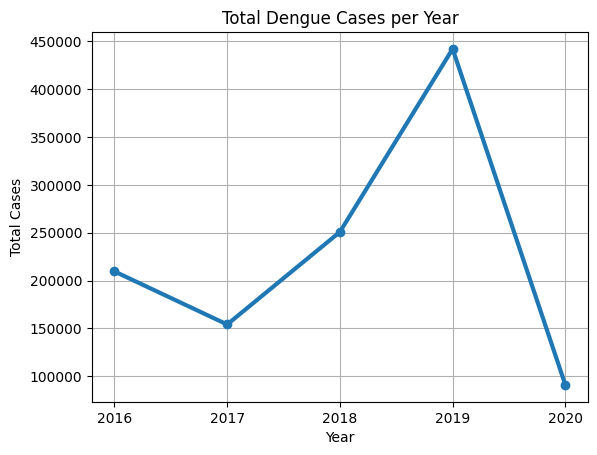

In [10]:
yearly_cases = dg.groupby('Year')['Dengue_Cases'].sum()
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', linewidth=3)
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.show()

<h1>Insight 1:</h1> 
<p> The result shows that from 2016 to 2020, dengue cases fluctuated sharply, peaking in 2019 with around 440,000 cases before dropping dramatically to 90,000 in 2020. This suggests a volatile trend possibly influenced by external factors like public health interventions during the pandemic.</p>

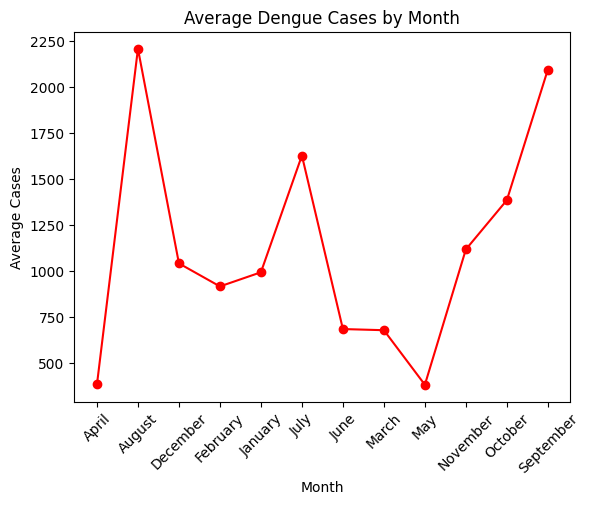

In [12]:
monthly_avg = dg.groupby('Month')['Dengue_Cases'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')
plt.title('Average Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 2:</h1>
<p>From April to March, dengue cases show strong seasonality, peaking in August and September with over 2,000 average cases per month. The lowest averages occur in May and March (~300–400 cases), suggesting that dengue transmission intensifies during the rainy season and tapers off in drier months.
</p>

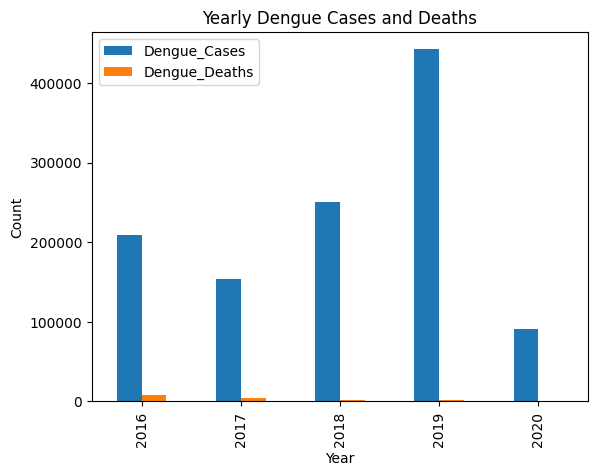

In [13]:
yearly = dg.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly.plot(kind='bar')
plt.title('Yearly Dengue Cases and Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<h1>Insight 3:</h1>
<p>Dengue cases and deaths varied widely from 2016 to 2020. In 2016, deaths were unusually high despite moderate case numbers. By 2019, cases surged but deaths stayed low, suggesting better treatment. In 2020, both dropped sharply, likely due to pandemic-related changes.</p>

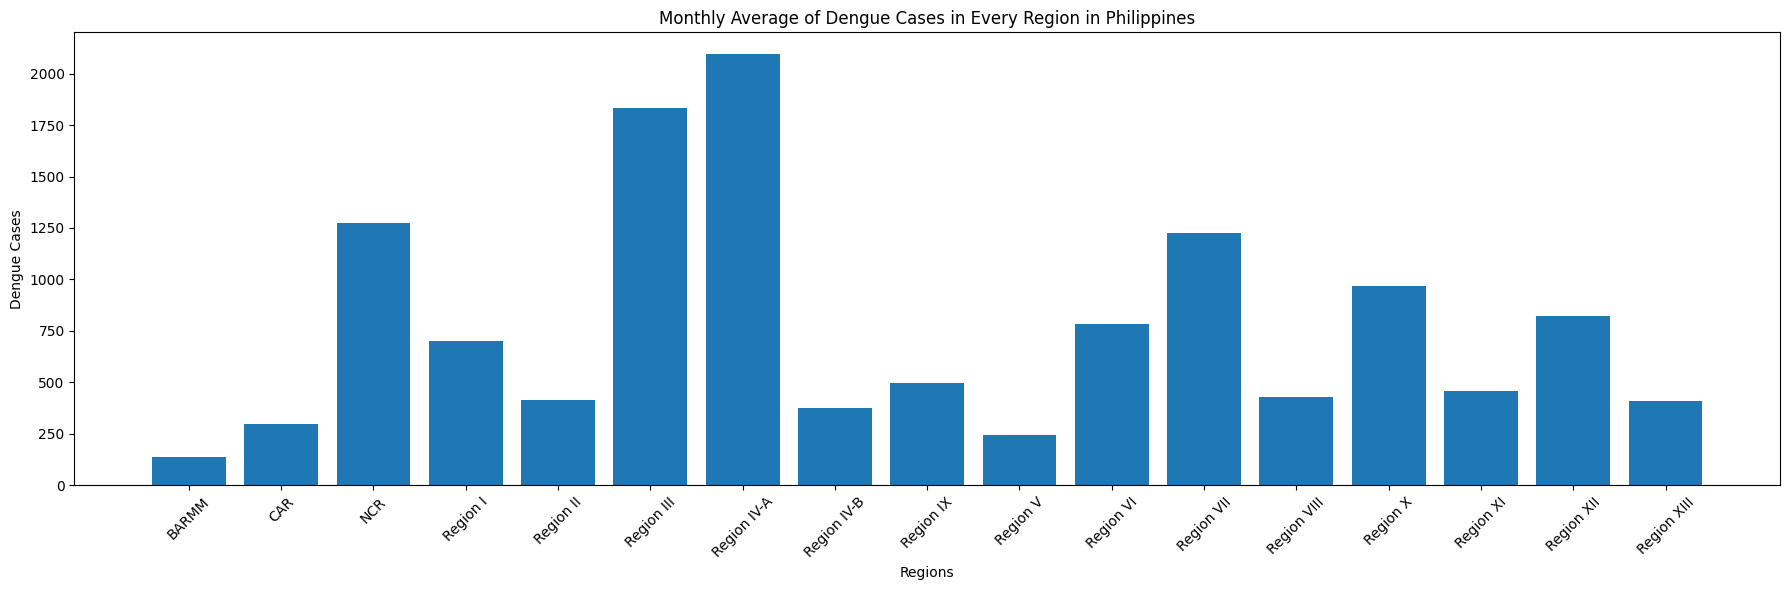

In [16]:
region_cases = dg.groupby('Region')['Dengue_Cases'].median()

regions = region_cases.index
cases = region_cases.values

plt.figure(figsize=(18, 6))
plt.bar(regions, cases)
plt.title('Monthly Average of Dengue Cases in Every Region in Philippines')
plt.xlabel('Regions')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<h1>Insight 4:</h1>
<p>This bar chart presents the average monthly dengue cases across different regions in the Philippines, revealing clear regional disparities. Regions IV-A and III report the highest averages, while NCR and Region VII also stand out with relatively high case numbers compared to other areas.
</p>

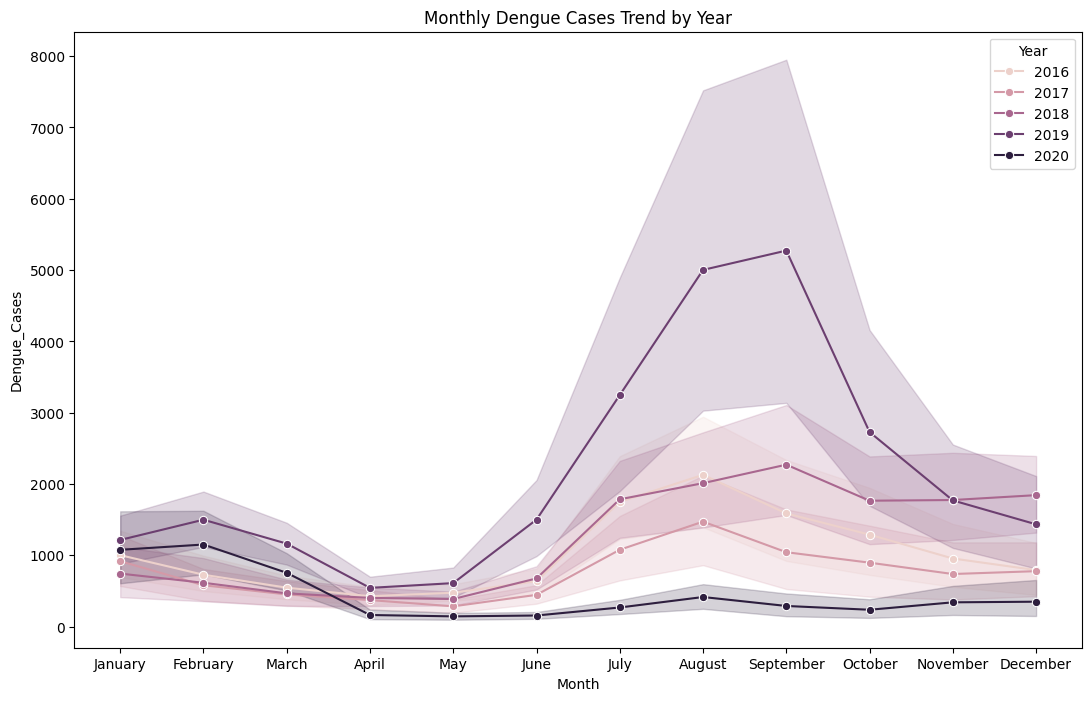

In [18]:
plt.figure(figsize=(13,8))
sns.lineplot(data=dg, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Dengue Cases Trend by Year')
plt.show()

<h1>Insight 5:</h1>
<p>The line chart illustrates the monthly trend of dengue cases from 2016 to 2020. Across all years, dengue cases generally increase during the middle of the year from July to September, coinciding with the rainy season. Year 2019 show a significant increase in cases, indicating a possible dengue outbreak.</p>

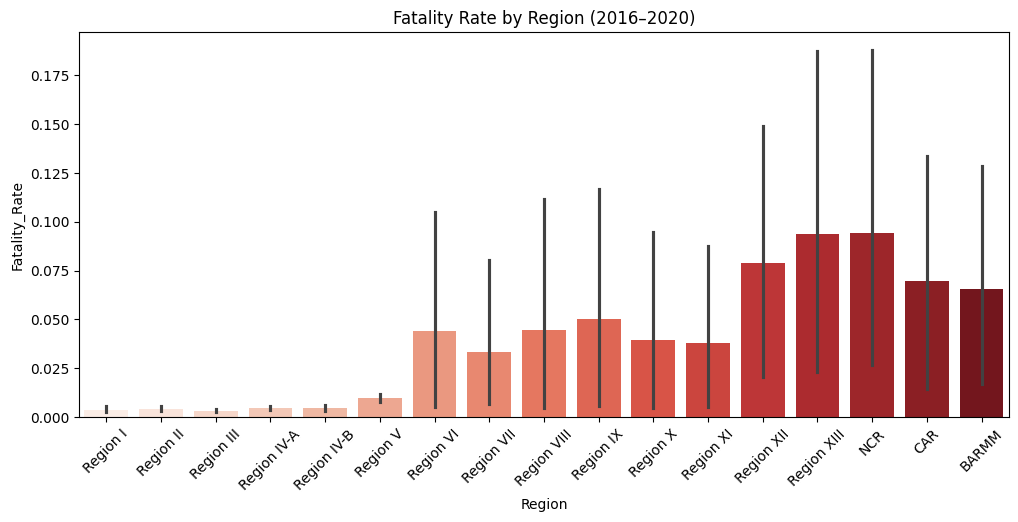

In [20]:
dg['Fatality_Rate'] = dg['Dengue_Deaths'] / dg['Dengue_Cases']
plt.figure(figsize=(12,5))
sns.barplot(data=dg, x='Region', y='Fatality_Rate', palette='Reds')
plt.title('Fatality Rate by Region (2016–2020)')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 6:</h1>
<p>The chart shows dengue fatality rates across various regions in the Philippines. Higher fatality rates in some areas may reflect challenges such as limited access to healthcare or delays in receiving treatment, especially when compared to regions with lower fatality rates.
</p>

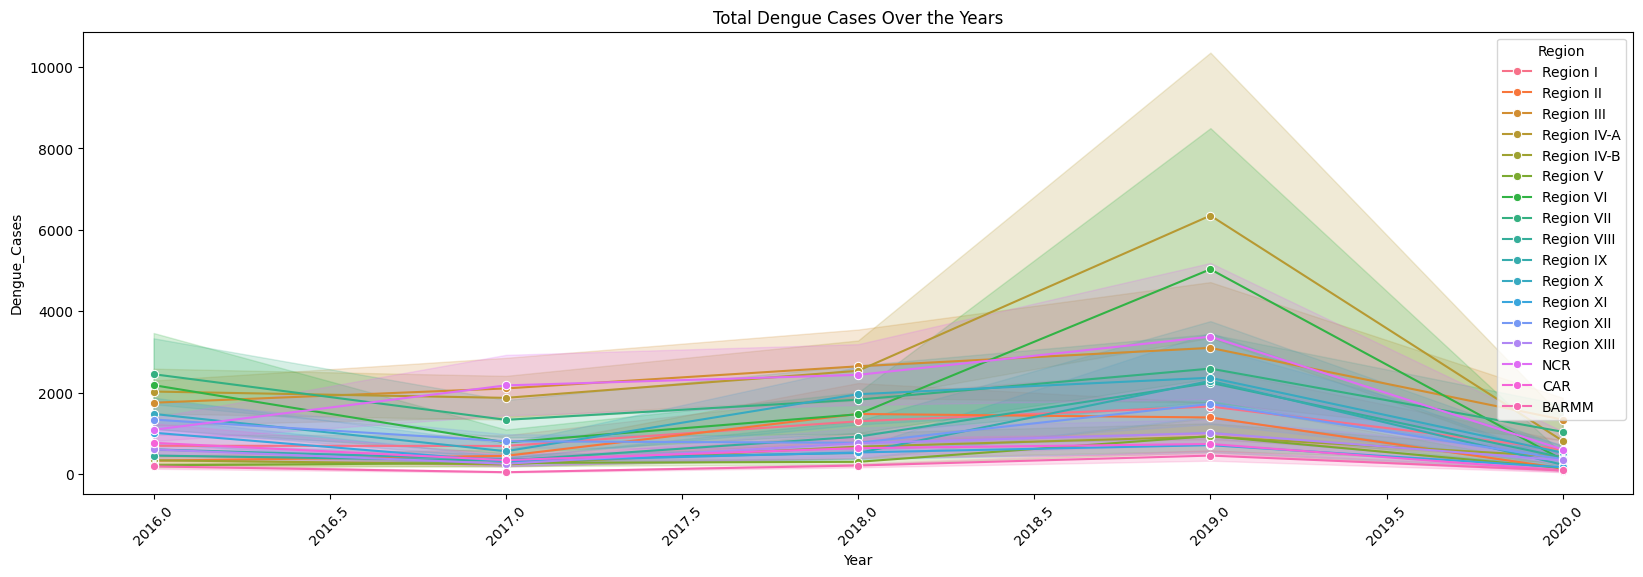

In [21]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=dg, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title('Total Dengue Cases Over the Years')
plt.xticks(rotation=45)
plt.show()

<h1>Insight 7:</h1>
<p>The graph reveals a clear spike in dengue cases across most Philippine regions in 2019, indicating a nationwide outbreak. While some regions consistently report higher case numbers, others show more moderate or fluctuating trends over the years. The shaded areas suggest variability, hinting at uncertainty or seasonal influences in reporting. This pattern underscores the need for region-specific strategies and early warning systems to manage future outbreaks effectively.
</p>

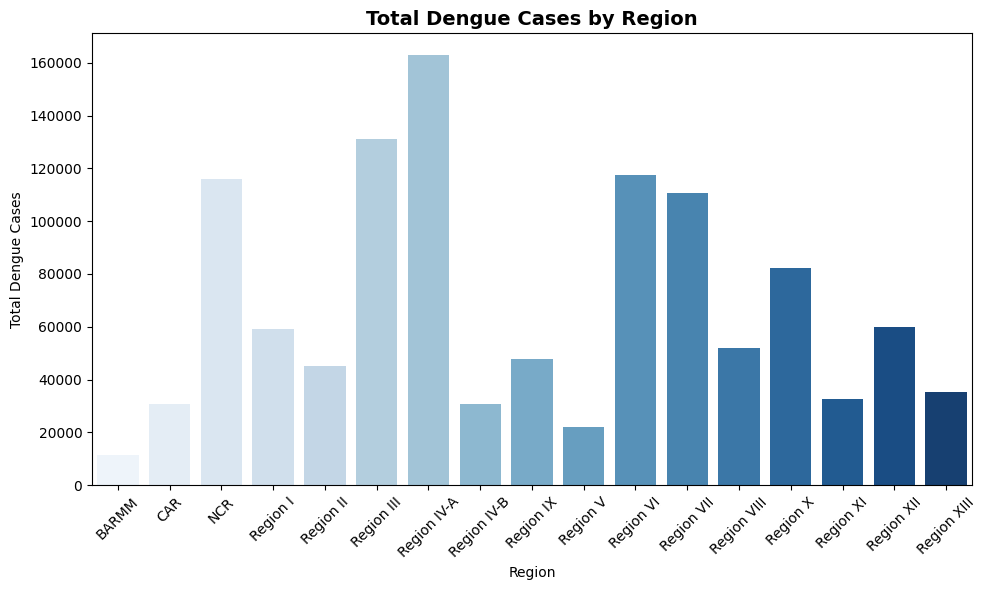

In [31]:
cases_region = dg.groupby('Region')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=cases_region, x='Region', y='Dengue_Cases', palette='Blues')
plt.title('Total Dengue Cases by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight 8:</h1>
<p>Region IV-A tops the list for total dengue cases, with Region III and Region VI not far behind—making them clear hotspots for transmission. These areas could really benefit from stronger mosquito control efforts and more community education. The high numbers likely reflect conditions like dense populations or environments that help mosquitoes thrive. Focusing health resources here could make a big difference in lowering dengue cases nationwide.
</p>

<h1>Insight 9:</h1>
<p>Regions like CAR and Region IV-B report substantially lower dengue case totals, highlighting stark differences in disease burden across the country. These disparities may reflect variations in climate, urban density, or healthcare infrastructure. Understanding why some regions remain less affected can inform more effective prevention strategies. A tailored, region-specific approach is essential for nationwide dengue control.</p>

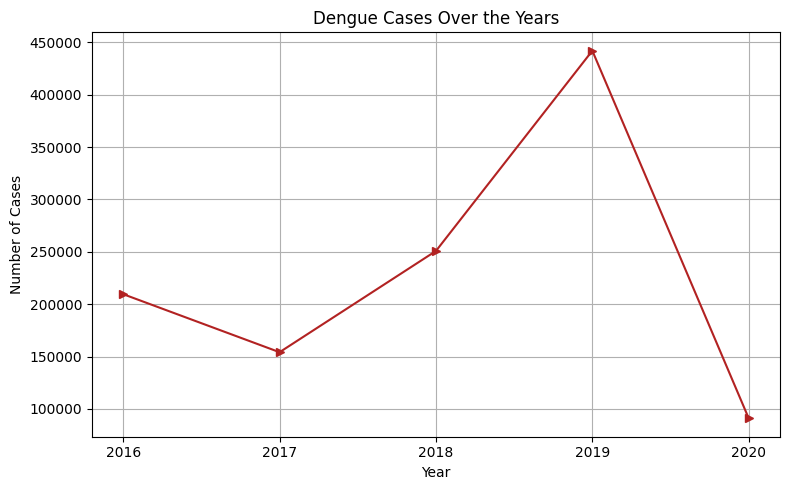

In [35]:
yearly_cases = dg.groupby('Year')['Dengue_Cases'].sum().reset_index()
yearly_cases['Year'] = yearly_cases['Year'].astype(int)

plt.figure(figsize=(8, 5))
plt.plot(yearly_cases['Year'], yearly_cases['Dengue_Cases'], marker='>', color='firebrick')
plt.title('Dengue Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(yearly_cases['Year']) 
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> Insight 10: </h1>
<p>Dengue cases climbed steadily from 2017 to 2019, with 2019 hitting a staggering 450,000 cases—a year that likely overwhelmed hospitals and communities. This sudden spike may reflect ideal conditions for mosquito breeding or gaps in early prevention. It was a wake-up call for stronger public health action.</p>

<h1>Insight 11: </h1>
<p>In 2020, dengue cases dropped sharply to around 100,000, a dramatic shift from the previous year. While this decline may be partly due to pandemic restrictions limiting outdoor exposure, it also hints at how behavior and environment can shape disease trends. It’s a hopeful sign that change is possible with the right conditions.</p>